#Table of Contents
* [Fresnel reflection coefficients](#Fresnel-reflection-coefficients)
* [Set up and imports](#Set-up-and-imports)
* [Compare external and internal reflection for $n_{low} = 1.0$ and $n_{high} = 1.5$ & $n_{high} = 2.5$](#Compare-external-and-internal-reflection-for-$n_{low}-=-1.0$-and-$n_{high}-=-1.5$-&-$n_{high}-=-2.5$)
* [Old](#Old)


# Fresnel reflection coefficients

The Fresnel reflection coefficients are 

$$\begin{aligned} \\
\Gamma_{TE} &= \frac{\eta_2/\cos{\theta_t} - \eta_1/\cos{\theta_i}}{\eta_2/\cos{\theta_t} + \eta_1/\cos{\theta_i}} = \frac{n_1\cos{\theta_i} - n_2\cos{\theta_t}}{n_1\cos{\theta_i} + n_2\cos{\theta_t}} \\
\Gamma_{TM}&= \frac{\eta_2\cos{\theta_t} - \eta_1\cos{\theta_i}}{\eta_2\cos{\theta_t} + \eta_1\cos{\theta_i}} = 
\frac{n_1\cos{\theta_t} - n_2\cos{\theta_i}}{n_1\cos{\theta_t} + n_2\cos{\theta_i}} \\
\end{aligned}$$

where $\eta_i$ and $n_i$ are the impedance and refractive index of the $i^{th}$ material. The reflectance and transmittance are:

$$\begin{aligned} \\
R &= |\Gamma|^2 \\
T &= 1 - R
\end{aligned}$$


# Set up and imports

In [107]:
%%javascript
IPython.load_extensions('calico-document-tools');

<IPython.core.display.Javascript object>

In [8]:
from __future__ import division, print_function, absolute_import

from tmm import (coh_tmm, unpolarized_RT, ellips,
                       position_resolved, find_in_structure_with_inf)

import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

try:
    import colorpy.illuminants
    import colorpy.colormodels
    from tmm import color
    colors_were_imported = True
except ImportError:
    # without colorpy, you can't run sample5(), but everything else is fine.
    colors_were_imported = False


# "5 * degree" is 5 degrees expressed in radians
# "1.2 / degree" is 1.2 radians expressed in degrees
degree = np.pi/180

# Compare external and internal reflection for $n_{low} = 1.0$ and $n_{high} = 1.5$ & $n_{high} = 2.5$

Assume a plane wave is propagating in medium 1 with refractive index $n_1$ and is incident on a planar interface between medium 1 and medium 2 where the refractive index of medium 2 is $n_2$. Plot the magnitude of the reflection coefficient as a function of incidence angle for both TE and TM polarization for the case of external ($n_1 \lt n_2$) and internal ($n_1 \gt n_2$) reflection.

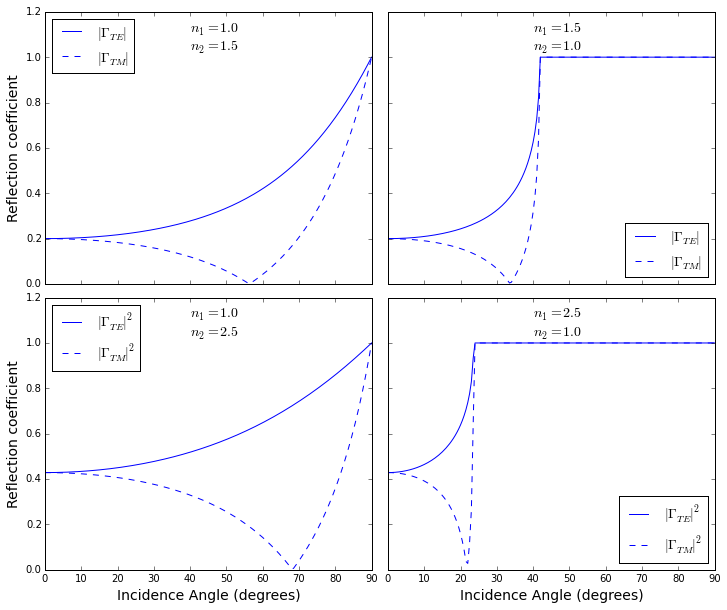

In [109]:
# list of layer thicknesses in nm
d_list = [np.inf, np.inf]
# list of refractive indices
nlow1 = 1.0
nhigh1 = 1.5
n_list_ext1 = [nlow1, nhigh1]
n_list_int1 = [nhigh1, nlow1]
nlow2 = 1.0
nhigh2 = 2.5
n_list_ext2 = [nlow2, nhigh2]
n_list_int2 = [nhigh2, nlow2]
wavelength = 0.5
angles_deg = np.linspace(0,90,num=181)
fsize = 14

# initialize lists of y-values to plot
r_ext_TE=[] 
r_ext_TM=[]
r_int_TE=[] 
r_int_TM=[]
R_ext_TE=[]
R_ext_TM=[]
R_int_TE=[]
R_int_TM=[]
for angle in angles_deg:
    r_ext_TE.append(coh_tmm('s',n_list_ext1, d_list, angle*degree, wavelength)['r'])
    r_ext_TM.append(coh_tmm('p',n_list_ext1, d_list, angle*degree, wavelength)['r'])
    r_int_TE.append(coh_tmm('s',n_list_int1, d_list, angle*degree, wavelength)['r'])
    r_int_TM.append(coh_tmm('p',n_list_int1, d_list, angle*degree, wavelength)['r'])
    R_ext_TE.append(coh_tmm('s',n_list_ext2, d_list, angle*degree, wavelength)['r'])
    R_ext_TM.append(coh_tmm('p',n_list_ext2, d_list, angle*degree, wavelength)['r'])
    R_int_TE.append(coh_tmm('s',n_list_int2, d_list, angle*degree, wavelength)['r'])
    R_int_TM.append(coh_tmm('p',n_list_int2, d_list, angle*degree, wavelength)['r'])
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
ax[0][0].set_ylabel('Reflection coefficient',fontsize=fsize)
ax[0][0].plot(angles_deg,np.abs(r_ext_TE),'b-',label='$|\Gamma_{TE}|$')
ax[0][0].plot(angles_deg,np.abs(r_ext_TM),'b--',label='$|\Gamma_{TM}|$')
ax[0][0].legend(loc=2,fontsize=14)
ax[0][0].text(40,1.03,'$n_1 = {}$\n$n_2 = {}$'.format(n_list_ext1[0],n_list_ext1[1]), fontsize=fsize)

ax[0][1].plot(angles_deg,np.abs(r_int_TE),'b-',label='$|\Gamma_{TE}|$')
ax[0][1].plot(angles_deg,np.abs(r_int_TM),'b--',label='$|\Gamma_{TM}|$')
ax[0][1].legend(loc=4,fontsize=fsize)
ax[0][1].text(40,1.03,'$n_1 = {}$\n$n_2 = {}$'.format(n_list_int1[0],n_list_int1[1]), fontsize=fsize)

ax[1][0].set_ylabel('Reflection coefficient',fontsize=fsize)
ax[1][0].plot(angles_deg,np.abs(R_ext_TE),'b-',label='$|\Gamma_{TE}|^2$')
ax[1][0].plot(angles_deg,np.abs(R_ext_TM),'b--',label='$|\Gamma_{TM}|^2$')
ax[1][0].set_xlabel('Incidence Angle (degrees)',fontsize=fsize)
ax[1][0].legend(loc=2,fontsize=14)
ax[1][0].text(40,1.03,'$n_1 = {}$\n$n_2 = {}$'.format(n_list_ext2[0],n_list_ext2[1]), fontsize=fsize)

ax[1][1].plot(angles_deg,np.abs(R_int_TE),'b-',label='$|\Gamma_{TE}|^2$')
ax[1][1].plot(angles_deg,np.abs(R_int_TM),'b--',label='$|\Gamma_{TM}|^2$')
ax[1][1].set_xlabel('Incidence Angle (degrees)',fontsize=fsize)
ax[1][1].legend(loc=4,fontsize=14)
ax[1][1].text(40,1.03,'$n_1 = {}$\n$n_2 = {}$'.format(n_list_int2[0],n_list_int2[1]), fontsize=fsize)

fig.subplots_adjust(hspace=0.05,wspace=0.05)

# Old

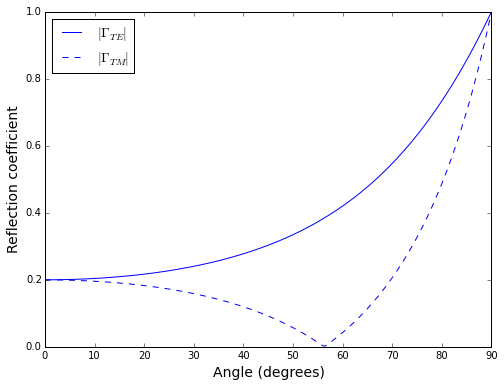

In [93]:
# list of layer thicknesses in nm
d_list = [np.inf,np.inf]
# list of refractive indices
n_list = [1,1.5]
wavelength = 0.5
angles_deg = np.linspace(0,90,num=181)
# initialize lists of y-values to plot
r_TE=[] 
r_TM=[]
for angle in angles_deg:
    r_TE.append(coh_tmm('s',n_list, d_list, angle*degree, wavelength)['r'])
    r_TM.append(coh_tmm('p',n_list, d_list, angle*degree, wavelength)['r'])
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(angles_deg,np.abs(r_TE),'b-',label='$|\Gamma_{TE}|$')
ax.plot(angles_deg,np.abs(r_TM),'b--',label='$|\Gamma_{TM}|$')
ax.set_xlabel('Angle (degrees)',fontsize=14)
ax.set_ylabel('Reflection coefficient',fontsize=14)
ax.legend(loc=0,fontsize=14)
#ax.title('Reflection of unpolarized light at 0$^\circ$ incidence (blue), ','45$^\circ$ (purple)');

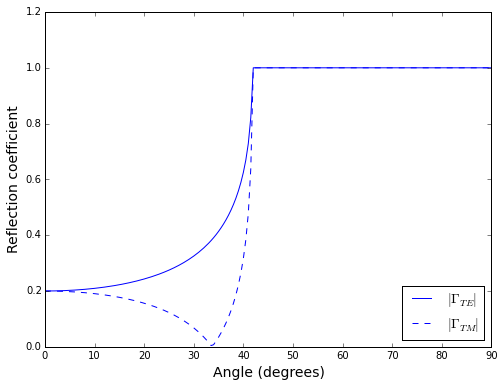

In [103]:
# list of layer thicknesses in nm
d_list = [np.inf,np.inf]
# list of refractive indices
n_list = [1.5,1.0]
wavelength = 0.5
angles_deg = np.linspace(0,90,num=181)
# initialize lists of y-values to plot
r_TE=[] 
r_TM=[]
for angle in angles_deg:
    r_TE.append(coh_tmm('s',n_list, d_list, angle*degree, wavelength)['r'])
    r_TM.append(coh_tmm('p',n_list, d_list, angle*degree, wavelength)['r'])
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(angles_deg,np.abs(r_TE),'b-',label='$|\Gamma_{TE}|$')
ax.plot(angles_deg,np.abs(r_TM),'b--',label='$|\Gamma_{TM}|$')
ax.set_xlabel('Angle (degrees)',fontsize=14)
ax.set_ylabel('Reflection coefficient',fontsize=14)
ax.legend(loc=4,fontsize=14)
#ax.title('Reflection of unpolarized light at 0$^\circ$ incidence (blue), ','45$^\circ$ (purple)');

In [21]:
print(np.arcsin(1.0/1.5)/degree)

41.8103148958


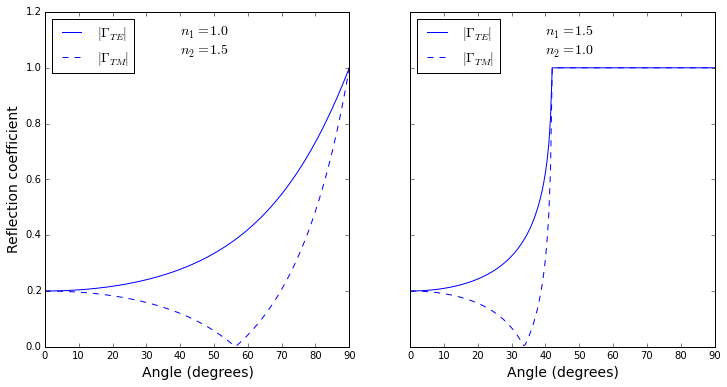

In [95]:
# list of layer thicknesses in nm
d_list = [np.inf, np.inf]
# list of refractive indices
n_list_ext = [1.0, 1.5]
n_list_int = [1.5, 1.0]
wavelength = 0.5
angles_deg = np.linspace(0,90,num=181)
fsize = 14

# initialize lists of y-values to plot
r_ext_TE=[] 
r_ext_TM=[]
r_int_TE=[] 
r_int_TM=[]
for angle in angles_deg:
    r_ext_TE.append(coh_tmm('s',n_list_ext, d_list, angle*degree, wavelength)['r'])
    r_ext_TM.append(coh_tmm('p',n_list_ext, d_list, angle*degree, wavelength)['r'])
    r_int_TE.append(coh_tmm('s',n_list_int, d_list, angle*degree, wavelength)['r'])
    r_int_TM.append(coh_tmm('p',n_list_int, d_list, angle*degree, wavelength)['r'])
fig, (ax_ext, ax_int) = plt.subplots(1, 2, sharey=True, figsize=(12,6))
ax_ext.set_ylabel('Reflection coefficient',fontsize=fsize)
ax_ext.plot(angles_deg,np.abs(r_ext_TE),'b-',label='$|\Gamma_{TE}|$')
ax_ext.plot(angles_deg,np.abs(r_ext_TM),'b--',label='$|\Gamma_{TM}|$')
ax_ext.set_xlabel('Angle (degrees)',fontsize=fsize)
ax_ext.legend(loc=2,fontsize=14)
ax_ext.text(40,1.05,'$n_1 = {}$\n$n_2 = {}$'.format(n_list_ext[0],n_list_ext[1]), fontsize=fsize)

ax_int.plot(angles_deg,np.abs(r_int_TE),'b-',label='$|\Gamma_{TE}|$')
ax_int.plot(angles_deg,np.abs(r_int_TM),'b--',label='$|\Gamma_{TM}|$')
ax_int.set_xlabel('Angle (degrees)',fontsize=fsize)
ax_int.legend(loc=2,fontsize=fsize)
ax_int.text(40,1.05,'$n_1 = {}$\n$n_2 = {}$'.format(n_list_int[0],n_list_int[1]), fontsize=fsize)

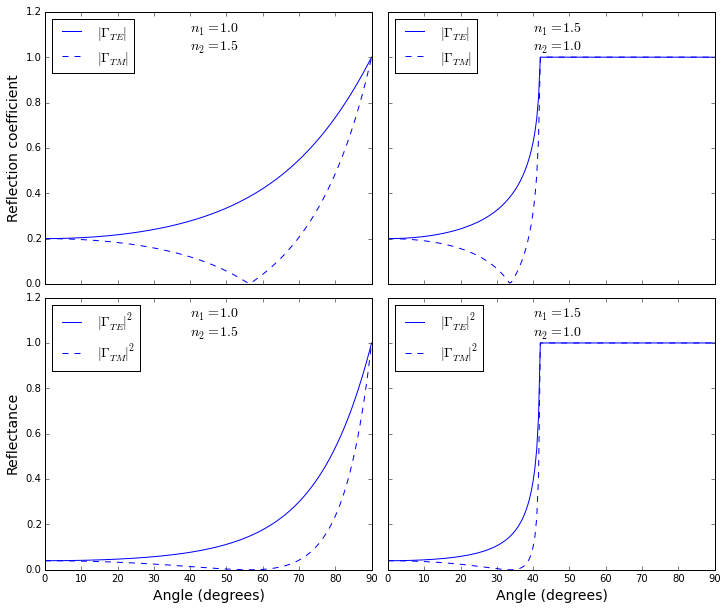

In [96]:
# list of layer thicknesses in nm
d_list = [np.inf, np.inf]
# list of refractive indices
nlow = 1.0
nhigh = 1.5
n_list_ext = [nlow, nhigh]
n_list_int = [nhigh, nlow]
wavelength = 0.5
angles_deg = np.linspace(0,90,num=181)
fsize = 14

# initialize lists of y-values to plot
r_ext_TE=[] 
r_ext_TM=[]
r_int_TE=[] 
r_int_TM=[]
R_ext_TE=[]
R_ext_TM=[]
R_int_TE=[]
R_int_TM=[]
for angle in angles_deg:
    r_ext_TE.append(coh_tmm('s',n_list_ext, d_list, angle*degree, wavelength)['r'])
    r_ext_TM.append(coh_tmm('p',n_list_ext, d_list, angle*degree, wavelength)['r'])
    r_int_TE.append(coh_tmm('s',n_list_int, d_list, angle*degree, wavelength)['r'])
    r_int_TM.append(coh_tmm('p',n_list_int, d_list, angle*degree, wavelength)['r'])
    R_ext_TE.append(coh_tmm('s',n_list_ext, d_list, angle*degree, wavelength)['R'])
    R_ext_TM.append(coh_tmm('p',n_list_ext, d_list, angle*degree, wavelength)['R'])
    R_int_TE.append(coh_tmm('s',n_list_int, d_list, angle*degree, wavelength)['R'])
    R_int_TM.append(coh_tmm('p',n_list_int, d_list, angle*degree, wavelength)['R'])
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
ax[0][0].set_ylabel('Reflection coefficient',fontsize=fsize)
ax[0][0].plot(angles_deg,np.abs(r_ext_TE),'b-',label='$|\Gamma_{TE}|$')
ax[0][0].plot(angles_deg,np.abs(r_ext_TM),'b--',label='$|\Gamma_{TM}|$')
ax[0][0].legend(loc=2,fontsize=14)
ax[0][0].text(40,1.03,'$n_1 = {}$\n$n_2 = {}$'.format(n_list_ext[0],n_list_ext[1]), fontsize=fsize)

ax[0][1].plot(angles_deg,np.abs(r_int_TE),'b-',label='$|\Gamma_{TE}|$')
ax[0][1].plot(angles_deg,np.abs(r_int_TM),'b--',label='$|\Gamma_{TM}|$')
ax[0][1].legend(loc=2,fontsize=fsize)
ax[0][1].text(40,1.03,'$n_1 = {}$\n$n_2 = {}$'.format(n_list_int[0],n_list_int[1]), fontsize=fsize)

ax[1][0].set_ylabel('Reflectance',fontsize=fsize)
ax[1][0].plot(angles_deg,np.abs(R_ext_TE),'b-',label='$|\Gamma_{TE}|^2$')
ax[1][0].plot(angles_deg,np.abs(R_ext_TM),'b--',label='$|\Gamma_{TM}|^2$')
ax[1][0].set_xlabel('Angle (degrees)',fontsize=fsize)
ax[1][0].legend(loc=2,fontsize=14)
ax[1][0].text(40,1.03,'$n_1 = {}$\n$n_2 = {}$'.format(n_list_ext[0],n_list_ext[1]), fontsize=fsize)

ax[1][1].plot(angles_deg,np.abs(R_int_TE),'b-',label='$|\Gamma_{TE}|^2$')
ax[1][1].plot(angles_deg,np.abs(R_int_TM),'b--',label='$|\Gamma_{TM}|^2$')
ax[1][1].set_xlabel('Angle (degrees)',fontsize=fsize)
ax[1][1].legend(loc=2,fontsize=14)
ax[1][1].text(40,1.03,'$n_1 = {}$\n$n_2 = {}$'.format(n_list_int[0],n_list_int[1]), fontsize=fsize)

fig.subplots_adjust(hspace=0.05,wspace=0.05)

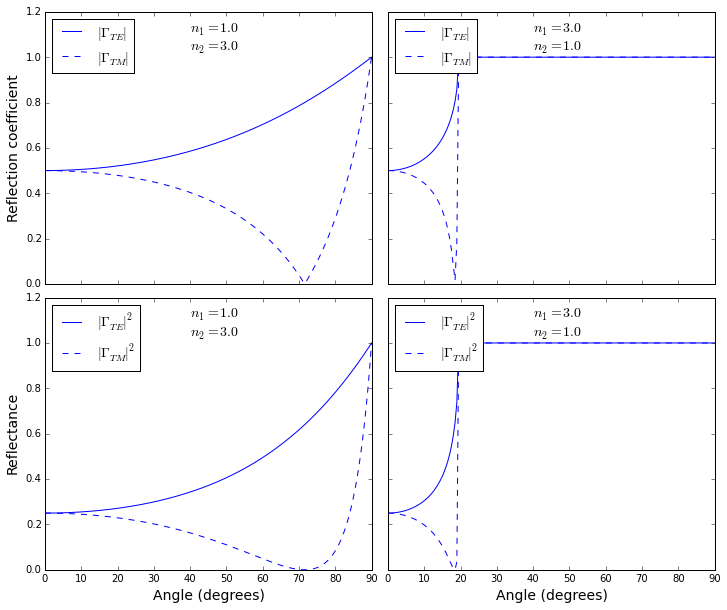

In [97]:
# list of layer thicknesses in nm
d_list = [np.inf, np.inf]
# list of refractive indices
nlow = 1.0
nhigh = 3.0
n_list_ext = [nlow, nhigh]
n_list_int = [nhigh, nlow]
wavelength = 0.5
angles_deg = np.linspace(0,90,num=181)
fsize = 14

# initialize lists of y-values to plot
r_ext_TE=[] 
r_ext_TM=[]
r_int_TE=[] 
r_int_TM=[]
R_ext_TE=[]
R_ext_TM=[]
R_int_TE=[]
R_int_TM=[]
for angle in angles_deg:
    r_ext_TE.append(coh_tmm('s',n_list_ext, d_list, angle*degree, wavelength)['r'])
    r_ext_TM.append(coh_tmm('p',n_list_ext, d_list, angle*degree, wavelength)['r'])
    r_int_TE.append(coh_tmm('s',n_list_int, d_list, angle*degree, wavelength)['r'])
    r_int_TM.append(coh_tmm('p',n_list_int, d_list, angle*degree, wavelength)['r'])
    R_ext_TE.append(coh_tmm('s',n_list_ext, d_list, angle*degree, wavelength)['R'])
    R_ext_TM.append(coh_tmm('p',n_list_ext, d_list, angle*degree, wavelength)['R'])
    R_int_TE.append(coh_tmm('s',n_list_int, d_list, angle*degree, wavelength)['R'])
    R_int_TM.append(coh_tmm('p',n_list_int, d_list, angle*degree, wavelength)['R'])
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
ax[0][0].set_ylabel('Reflection coefficient',fontsize=fsize)
ax[0][0].plot(angles_deg,np.abs(r_ext_TE),'b-',label='$|\Gamma_{TE}|$')
ax[0][0].plot(angles_deg,np.abs(r_ext_TM),'b--',label='$|\Gamma_{TM}|$')
ax[0][0].legend(loc=2,fontsize=14)
ax[0][0].text(40,1.03,'$n_1 = {}$\n$n_2 = {}$'.format(n_list_ext[0],n_list_ext[1]), fontsize=fsize)

ax[0][1].plot(angles_deg,np.abs(r_int_TE),'b-',label='$|\Gamma_{TE}|$')
ax[0][1].plot(angles_deg,np.abs(r_int_TM),'b--',label='$|\Gamma_{TM}|$')
ax[0][1].legend(loc=2,fontsize=fsize)
ax[0][1].text(40,1.03,'$n_1 = {}$\n$n_2 = {}$'.format(n_list_int[0],n_list_int[1]), fontsize=fsize)

ax[1][0].set_ylabel('Reflectance',fontsize=fsize)
ax[1][0].plot(angles_deg,np.abs(R_ext_TE),'b-',label='$|\Gamma_{TE}|^2$')
ax[1][0].plot(angles_deg,np.abs(R_ext_TM),'b--',label='$|\Gamma_{TM}|^2$')
ax[1][0].set_xlabel('Angle (degrees)',fontsize=fsize)
ax[1][0].legend(loc=2,fontsize=14)
ax[1][0].text(40,1.03,'$n_1 = {}$\n$n_2 = {}$'.format(n_list_ext[0],n_list_ext[1]), fontsize=fsize)

ax[1][1].plot(angles_deg,np.abs(R_int_TE),'b-',label='$|\Gamma_{TE}|^2$')
ax[1][1].plot(angles_deg,np.abs(R_int_TM),'b--',label='$|\Gamma_{TM}|^2$')
ax[1][1].set_xlabel('Angle (degrees)',fontsize=fsize)
ax[1][1].legend(loc=2,fontsize=14)
ax[1][1].text(40,1.03,'$n_1 = {}$\n$n_2 = {}$'.format(n_list_int[0],n_list_int[1]), fontsize=fsize)

fig.subplots_adjust(hspace=0.05,wspace=0.05)